<a href="https://colab.research.google.com/github/Oreolorun/NeuralNetsPractice/blob/main/Convolutional_Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#  unzipping dataset
!unzip gdrive/My\ Drive/Datasets/kagglecatsanddogs_3367a.zip > /dev/null

In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import seaborn as sns

### Cats vs Dogs

In [ ]:
#  define class to build data
REBUILD_DATA=True

class DogsVSCats():
  def __init__(self):
    self.IMG_SIZE = 50
    self.CATS = 'PetImages/Cat'
    self.DOGS = 'PetImages/Dog'
    self.LABELS = {self.CATS: 0, self.DOGS: 1}
    self.training_data = []
    self.catcount = 0
    self.dogcount = 0

  def make_training_data(self):
    for label in self.LABELS:
      print(label)
      for f in tqdm(os.listdir(label)):
        try:
          path = os.path.join(label, f)
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
          self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

          if label == self.CATS:
            self.catcount+=1
          elif label == self.DOGS:
            self.dogcount+=1
        except Exception as e:
          pass

    np.random.shuffle(self.training_data)
    np.save('training_data.npy', self.training_data)
    print('Cats:', self.catcount)
    print('Dogs:', self.dogcount)

if REBUILD_DATA:
  dogsvcats = DogsVSCats()
  dogsvcats.make_training_data()

PetImages/Cat


100%|██████████| 12501/12501 [00:15<00:00, 801.84it/s]


PetImages/Dog


100%|██████████| 12501/12501 [00:16<00:00, 769.57it/s]
/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Cats: 12476
Dogs: 12470


In [ ]:
training_data = np.load('training_data.npy', allow_pickle=True)

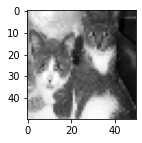

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(training_data[9576][0], cmap='gray')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 32, 5)
    self.conv2 = nn.Conv2d(32, 64, 5)
    self.conv3 = nn.Conv2d(64, 128, 5)

    x = torch.randn(50,50).view(-1,1,50,50)
    self._to_linear = None
    self.convs(x)
    self.fc1 = nn.Linear(self._to_linear, 512)
    self.fc2 = nn.Linear(512, 2)

  def convs(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

    print(x[0].shape)
    if self._to_linear is None:
      self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
    return x

  def forward(self, x):
    x = self.convs(x)
    x = x.view(-1, self._to_linear)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.softmax(x, dim=1)

net = Net()

torch.Size([128, 2, 2])


In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

X = torch.tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0
y = torch.tensor([i[1] for i in training_data])

val_pct = 0.1
val_size = int(len(X))*val_pct
val_size = int(val_size)
val_size

2494

In [ ]:
X_train = X[:-val_size]
y_train = y[:-val_size]

X_test = X[-val_size:]
y_test = y[-val_size:]

print(len(X_test))
print(len(X_train))

2494
22452


In [ ]:
range(1)

range(0, 1)

In [ ]:
batch_size = 100
epochs = 1

for epoch in range(epochs):
  for i in tqdm_notebook(range(0, len(X_train), batch_size)):
    batch_x = X_train[i:i+batch_size].view(-1, 1, 50, 50)
    batch_y = y_train[i:i+batch_size]

    net.zero_grad()
    outputs = net(batch_x)
    loss = loss_fn(outputs.float(), batch_y.float())
    loss.backward()
    optimizer.step()

print(loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/225 [00:00<?, ?it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

In [ ]:
correct = 0
total = 0
with torch.np_grad():
  for i in tqdm_notebook(range(len(X_test))):
    real_class = torch.argmax(test_y[i])
    net_out = net(test)

### Concepts

In [5]:
#******************************************************************************
cat_imgs = []
parent_dir = 'PetImages/Cat'

for file in tqdm(os.listdir(parent_dir)):
  path = os.path.join(parent_dir, file)
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  cat_imgs.append(img)

100%|██████████| 12501/12501 [00:16<00:00, 771.84it/s]


In [ ]:
from PIL import Image

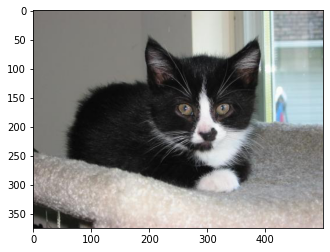

In [ ]:
image = Image.open('PetImages/Cat/590.jpg') # 210, 340
plt.imshow(image)
plt.savefig('gdrive/My Drive/Datasets/plt_plots/to_crop.png', dpi=1000)

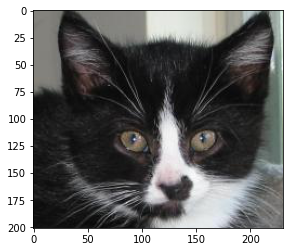

In [ ]:
gray = np.array(image)
cropped = gray[50:251, 170:401]
plt.imshow(cropped)
plt.savefig('gdrive/My Drive/Datasets/plt_plots/cropped.png', dpi=1000)

In [ ]:
with open('test.jpg', 'wb') as f:
  f.write(gray)

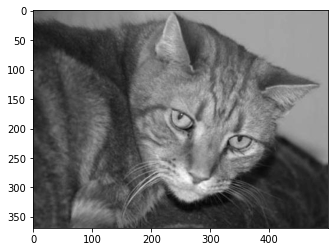

In [10]:
plt.imshow(cat_imgs[13], cmap='gray') #  10, 29, 39

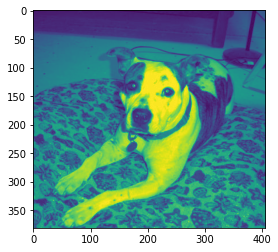

In [ ]:
sample = dog_imgs[48]
plt.imshow(sample)

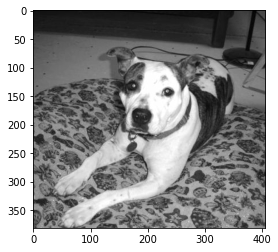

In [ ]:
ex1 = sample.copy()
plt.imshow(ex1, cmap='gray')

### Redundant Code

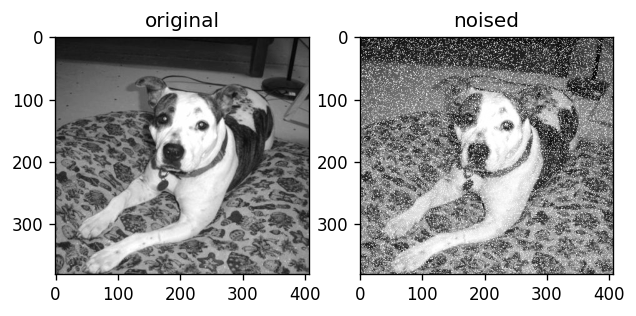

In [ ]:
def noise_image(image, probability):
  threshold = 1-probability
  noised = np.ones(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      random_float = np.random.rand(1).item()
      if random_float < threshold:
        noised[i,j] = 0
      if random_float > threshold:
        noised[i,j] = 255
      else:
        noised[i,j] = image[i,j]
  fig, axes = plt.subplots(1,2, dpi=120)
  axes[0].imshow(image, cmap='gray')
  axes[1].imshow(noised, cmap='gray')
  axes[0].set_title('original')
  axes[1].set_title('noised')

noise_image(sample, 0.15)

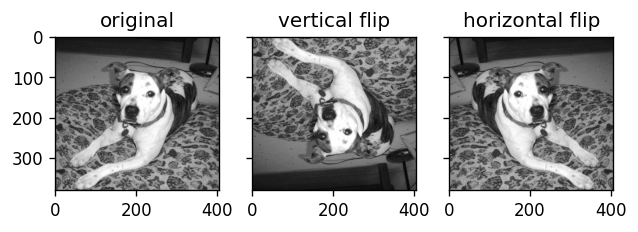

In [ ]:
def flip_image(image):
  flipped_vertical = cv2.flip(image, 0)
  flipped_horizontal = cv2.flip(image, 1)
  fig, axes = plt.subplots(1,3, dpi=120, sharey=True)
  axes[0].imshow(image, cmap='gray')
  axes[1].imshow(flipped_vertical, cmap='gray')
  axes[2].imshow(flipped_horizontal, cmap='gray')
  axes[0].set_title('original')
  axes[1].set_title('vertical flip')
  axes[2].set_title('horizontal flip')

flip_image(sample)

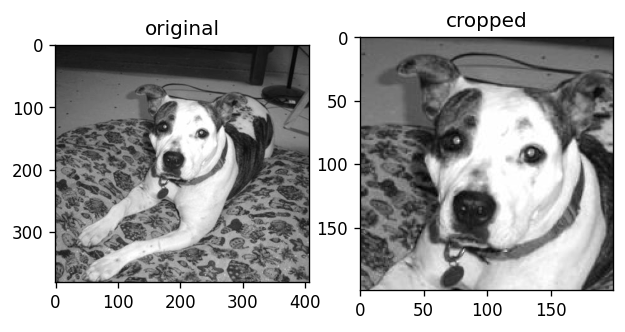

In [ ]:
def crop_image(image):
  cropped = image[50:250,100:300]
  figure, axes = plt.subplots(1,2, dpi=120)
  axes[0].imshow(image, cmap='gray')
  axes[1].imshow(cropped, cmap='gray')
  axes[0].set_title('original')
  axes[1].set_title('cropped')

crop_image(sample)

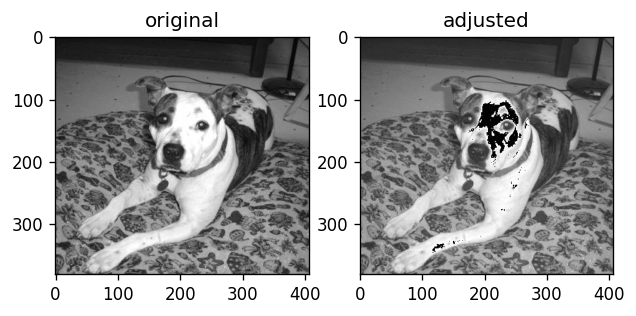

In [ ]:
def adjust_contrast(image, amount):
  adjusted = image + amount
  figure, axes = plt.subplots(1,2, dpi=120)
  axes[0].imshow(image, cmap='gray')
  axes[1].imshow(adjusted, cmap='gray')
  axes[0].set_title('original')
  axes[1].set_title('adjusted')

adjust_contrast(sample, 5)

100%|██████████| 381/381 [00:00<00:00, 486.39it/s]


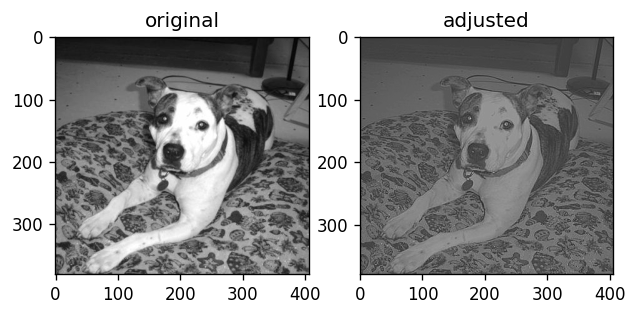

In [ ]:
temp = np.array([[0,-1,0],
                 [-1,5,-1],
                 [0,-1,0]])

def adjust_image(image, kernel_size=3, filter=temp):
  """This function performs convolution over an image
   with the aim of identifying edges"""
  #  creating an empty list to store convolutions
  edges = []
  #  performing convolution
  for i in tqdm(range(image.shape[0])):
    for j in range(image.shape[1]):
      try:
        edges.append((image[i:(i+kernel_size), j:(j+kernel_size)] * filter).sum())
      except ValueError:
        pass
  #  determining the new number of pixels
  num_pixels = len(edges)
  #  deriving factors of pixel count
  factors = []
  for number in range(400, 500):
    if num_pixels % number == 0:
      factors.append(number)
  #  converting to array and reshaping
  edges = np.array(edges).reshape((-1, max(factors)))
  #  converting to tensor
  edges = torch.Tensor(edges)
  #  saving to memory
  np.save('conv_pixels.npy', edges)
  #  displaying results
  figure, axes = plt.subplots(1,2, dpi=120)
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('original')
  axes[1].imshow(edges, cmap='gray')
  axes[1].set_title('adjusted')

adjust_image(sample)

100%|██████████| 381/381 [00:00<00:00, 444.29it/s]


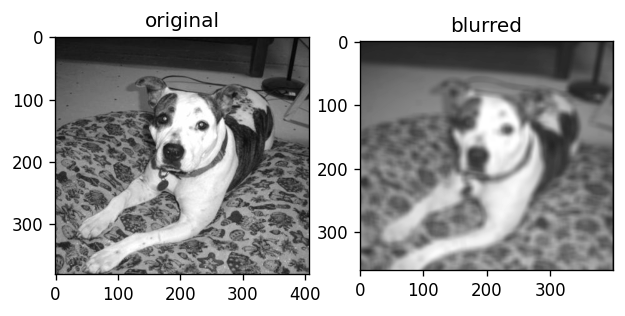

In [ ]:
def blur_image(image, intensity=10):
  """This function performs convolution over an image
   with the aim of identifying edges"""
  filter = 0.1*(np.ones((intensity,intensity)))
  #  creating an empty list to store convolutions
  edges = np.zeros(image.shape)
  #  performing convolution
  for i in tqdm(range(image.shape[0])):
    for j in range(image.shape[1]):
      try:
        edges[i,j] = ((image[i:(i+intensity), j:(j+intensity)] * filter).sum())
      except ValueError:
        pass
  #  determining the new number of pixels
  #num_pixels = len(edges)
  #  deriving factors of pixel count
  #factors = []
  #for number in range(400, 500):
    #if num_pixels % number == 0:
      #factors.append(number)
  #  converting to array and reshaping
  #edges = np.array(edges).reshape((-1, max(factors)))
  #  converting to tensor
  edges = torch.Tensor(edges)
  #  saving to memory
  np.save('conv_pixels.npy', edges)
  #  displaying results
  edges = edges[:360, :400]
  figure, axes = plt.subplots(1,2, dpi=120)
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('original')
  axes[1].imshow(edges, cmap='gray')
  axes[1].set_title('blurred')

blur_image(sample)

In [ ]:
sample

array([[ 22,  22,  21, ...,  80,  79,  78],
       [ 31,  30,  29, ...,  83,  82,  81],
       [ 33,  32,  32, ...,  81,  81,  80],
       ...,
       [126, 113,  96, ..., 121, 126, 126],
       [147, 131, 109, ..., 133, 147, 153],
       [136, 115,  94, ..., 151, 156, 154]], dtype=uint8)

In [ ]:
random_values_x = np.random.permutation(381)
random_values_y = np.random.permutation(381)

combined = zip(random_values_x, random_values_y)
for item in combined:
  print(item[0])
  break

27


In [ ]:
ex1[:,:,0]

array([[ 20,  20,  19, ...,  32,  31,  30],
       [ 29,  28,  27, ...,  35,  34,  33],
       [ 31,  30,  30, ...,  33,  33,  32],
       ...,
       [103,  90,  77, ...,  78,  83,  83],
       [120, 106,  86, ...,  92, 106, 112],
       [106,  87,  69, ..., 114, 117, 115]], dtype=uint8)

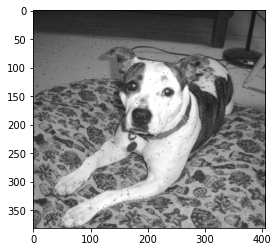

In [ ]:
i=0

for xy in combined:
  ex1[xy[0], xy[1]] = 0
  i+=1
  if i == 350:
    ex1[xy[0], xy[1]] = 255
    i+=1
    if i == 350:
      break

plt.imshow(ex1, cmap='gray')

In [ ]:
kernel = 0.1*(np.ones((15,15)))
blur = []
for i in tqdm(range(sample.shape[0])):
  for j in range(sample.shape[1]):
    try:
      blur.append((sample[i:(i+15), j:(j+15)] * kernel).sum())
    except ValueError:
      pass

100%|██████████| 375/375 [00:01<00:00, 325.17it/s]


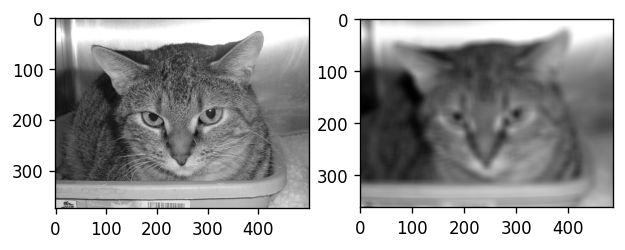

In [ ]:
blur = np.array(blur).reshape((-1, 487))
figure, axes = plt.subplots(1,2, dpi=120)
axes[0].imshow(sample, cmap='gray')
axes[1].imshow(blur, cmap='gray')

In [ ]:
def blur_image(image, intensity=15):
  """This function performs convolution over an image
   with the aim of reducing pixel intensities thereby blurring said image"""
  #  creating a filter
  filter = 0.1*(np.ones((intensity,intensity)))
  #  creating an empty list to store convolutions
  blurred = []
  #  performing convolution
  for i in tqdm(range(image.shape[0])):
    for j in range(image.shape[1]):
      try:
        blurred.append((image[i:(i+intensity), j:(j+intensity)] * filter).sum())
      except ValueError:
        pass
  #  determining the new number of pixels
  num_pixels = len(blurred)
  #  deriving factors of pixel count
  factors = []
  for number in range(400, 500):
    if num_pixels % number == 0:
      factors.append(number)
  #  converting to array and reshaping
  blurred = np.array(blurred).reshape((-1, max(factors)))
  #  displaying results
  figure, axes = plt.subplots(1,2, dpi=120)
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('original')
  axes[1].imshow(blurred, cmap='gray')
  axes[1].set_title('blurred')

100%|██████████| 375/375 [00:01<00:00, 336.16it/s]


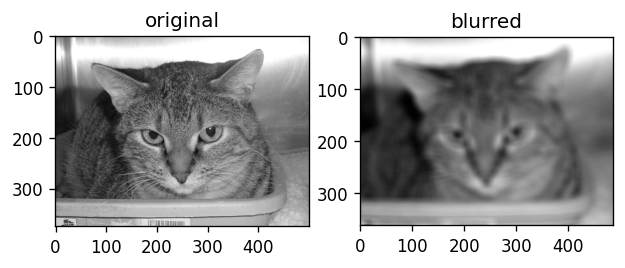

In [ ]:
blur_image(cat_imgs[0])

100%|██████████| 375/375 [00:01<00:00, 353.35it/s]


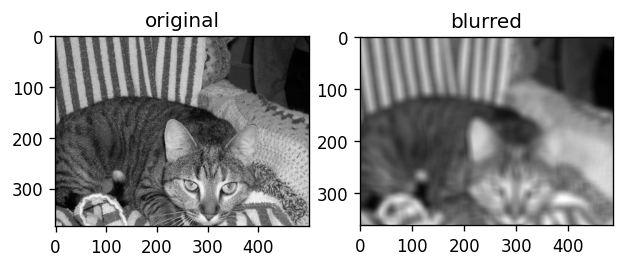

In [ ]:
blur_image(cat_imgs[15])

100%|██████████| 466/466 [00:01<00:00, 334.83it/s]


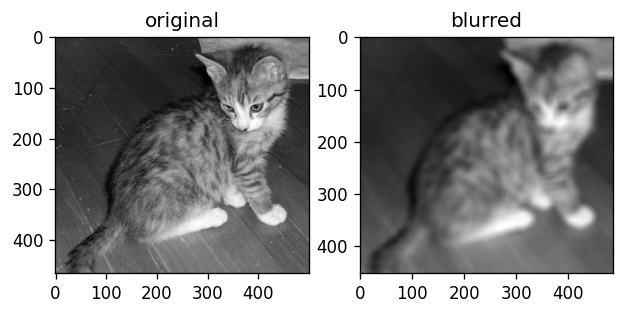

In [ ]:
blur_image(cat_imgs[5489])

### New Code

In [11]:
import torch.nn.functional as F
import torch

In [ ]:
temp = np.ones((3,3))
temp[:,0] = -1
temp[:,1] = 0

def convolve(image, kernel_size=3, filter=temp, title=''):
  """This function performs convolution over an image
   with the aim of identifying edges"""
  #  creating an empty list to store convolutions
  edges = np.zeros(((image.shape[0] - kernel_size) + 1, 
                    (image.shape[1] - kernel_size) + 1))
  #  performing convolution
  for i in tqdm(range(image.shape[0])):
    for j in range(image.shape[1]):
      try:
        edges[i,j] = (image[i:(i+kernel_size), j:(j+kernel_size)] * filter).sum()
      except Exception:
        pass
  #  converting to tensor
  edges = torch.Tensor(edges)
  #  applying RELu activation
  edges = F.relu(edges)
  #  saving to memory
  np.save('conv_pixels.npy', edges)
  #  displaying results
  figure, axes = plt.subplots(1,2, dpi=120)
  plt.suptitle(title)
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('original')
  axes[1].imshow(edges, cmap='gray')
  axes[1].set_title('detected edges')
  return edges

In [26]:
temp = np.ones((3,3))
temp[:,0] = -1
temp[:,1] = 0

def convolve(image, kernel_size=3, filter=temp, title='', stride=1):
  """This function performs convolution over an image
   with the aim of identifying edges"""
  #  creating an empty array to store convolutions
  dim_x = ((image.shape[0] - kernel_size) + 1)//stride
  dim_y = ((image.shape[1] - kernel_size) + 1)//stride
  edges = np.zeros((dim_x, dim_y))
  
  #  performing convolution
  for i in tqdm(range(0, image.shape[0], stride)):
    for j in range(0, image.shape[1], stride):
      try:
        edges[i,j] = (image[i:(i+kernel_size), j:(j+kernel_size)] * filter).sum()
      except Exception:
        pass
  #  converting to tensor
  edges = torch.Tensor(edges)
  #  applying RELu activation
  edges = F.relu(edges)
  #  saving to memory
  np.save('conv_pixels.npy', edges)
  #  displaying results
  figure, axes = plt.subplots(1,2, dpi=120)
  plt.suptitle(title)
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('original')
  axes[1].imshow(edges, cmap='gray')
  axes[1].set_title('detected edges')
  return edges

100%|██████████| 369/369 [00:01<00:00, 366.34it/s]


tensor([[3., 0., 0.,  ..., 2., 0., 0.],
        [3., 0., 0.,  ..., 4., 0., 0.],
        [3., 0., 0.,  ..., 6., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 4., 0., 0.],
        [0., 0., 3.,  ..., 3., 0., 0.],
        [8., 7., 8.,  ..., 0., 0., 1.]])

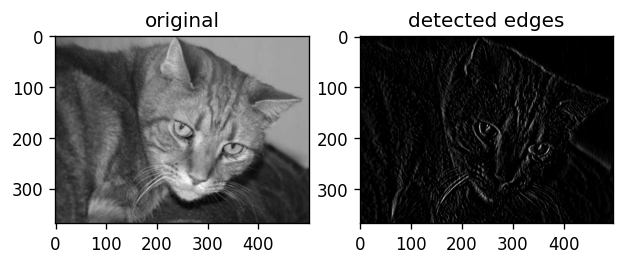

In [40]:
convolve(cat_imgs[13], stride=1)

In [39]:
len(list(range(0, 369, 2)))

185

In [25]:
list(range(0, 10, 2))

[0, 2, 4, 6, 8]

In [ ]:
def pad_image(image, kernel_size=5, title=''):
  padding = kernel_size -1
  padded = arr = np.zeros((image.shape[0] + padding, 
                           image.shape[1] + padding))
  
  padded[int(padding/2):-int(padding/2), 
         int(padding/2):-int(padding/2)] = image

  #  displaying results
  figure, axes = plt.subplots(1,2, sharey=True, dpi=120)
  plt.suptitle(title)
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('original')
  axes[1].imshow(padded, cmap='gray')
  axes[1].set_title('padded')  
  return padded

In [ ]:
gauss_5 = np.array([
                    [1, 4, 7, 4, 1],
                    [4, 16, 26, 16, 4],
                    [7, 26, 41, 26, 7],
                    [4, 16, 26, 16, 4],
                    [1, 4, 7, 4, 1]
])

gauss_5 = 1/273 * gauss_5

def blur_image(image, kernel_size=3, filter=gauss_5, title='', padding=False):
  """This function performs convolution over an image
   with the aim of blurring"""
  if padding:
    image = pad_image(image, kernel_size=kernel_size)
  else:
    image = image
  #  creating an array to store convolutions
  blurred = np.zeros(((image.shape[0] - kernel_size) + 1, 
                    (image.shape[1] - kernel_size) + 1))
  #  performing convolution
  for i in tqdm(range(image.shape[0])):
    for j in range(image.shape[1]):
      try:
        blurred[i,j] = (image[i:(i+kernel_size), j:(j+kernel_size)] * filter).sum()
      except Exception:
        pass
  #  displaying results
  figure, axes = plt.subplots(1,2, dpi=120)
  plt.suptitle(title)
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('original')
  axes[1].imshow(blurred, cmap='gray')
  axes[1].set_title('blurred')
  return blurred

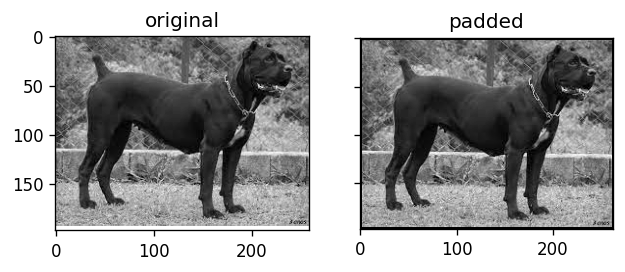

In [ ]:
padded = pad_image(image)
plt.savefig('gdrive/My Drive/Datasets/plt_plots/padding_demo.png', dpi=1000)

In [ ]:
gauss_2 = np.array([
                    [1, 4, 7, 4, 1],
                    [4, 16, 26, 16, 4],
                    [7, 26, 41, 26, 7],
                    [4, 16, 26, 16, 4],
                    [1, 4, 7, 4, 1]
])

gauss_2 = 1/273 * gauss_2
gauss_2 = gauss_2.round(3)
gauss_2

array([[0.004, 0.015, 0.026, 0.015, 0.004],
       [0.015, 0.059, 0.095, 0.059, 0.015],
       [0.026, 0.095, 0.15 , 0.095, 0.026],
       [0.015, 0.059, 0.095, 0.059, 0.015],
       [0.004, 0.015, 0.026, 0.015, 0.004]])

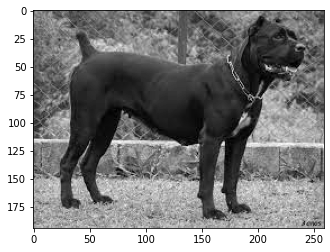

In [ ]:
image = cv2.imread('sample_4.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.savefig('gdrive/My Drive/Datasets/plt_plots/padding_image.png', dpi=1000)

100%|██████████| 198/198 [00:00<00:00, 902.99it/s]


original: (194, 259)
blurred: (194, 259)


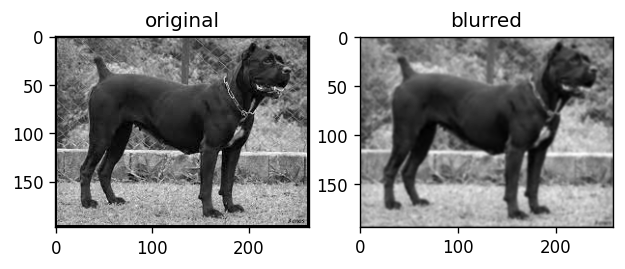

In [ ]:
blurred = blur_image(image, kernel_size=5, filter=gauss_5, padding=True)
print(f'original: {image.shape}\nblurred: {blurred.shape}')
plt.savefig('gdrive/My Drive/Datasets/plt_plots/with_padding.png', dpi=1000)

In [ ]:
arr = np.zeros((image.shape[0]+4, image.shape[1]+4))
print(image.shape, arr.shape)

(194, 259) (198, 263)


In [ ]:
arr[2:-2, 2:-2] = image

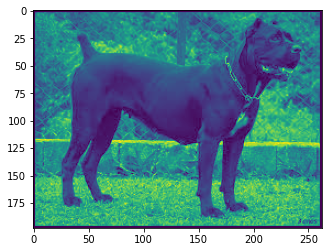

In [ ]:
plt.imshow(arr)

100%|██████████| 198/198 [00:00<00:00, 923.57it/s]


original: (194, 259)
blurred: (194, 259)


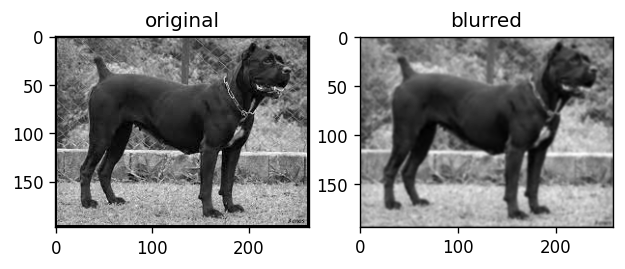

In [ ]:
blurred_2 = blur_image(arr, kernel_size=5, filter=gauss_5)
print(f'original: {image.shape}\nblurred: {blurred_2.shape}')

100%|██████████| 262/262 [00:00<00:00, 550.09it/s]


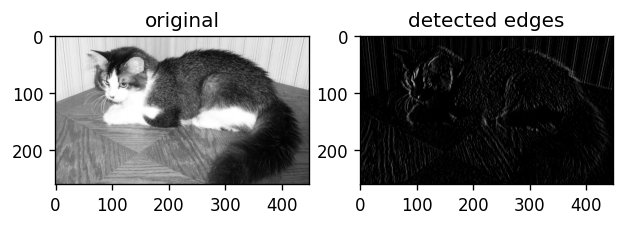

In [ ]:
edge = detect_edges(cat_imgs[119])
plt.savefig('gdrive/My Drive/Datasets/plt_plots/edges_x.png', dpi=1000)

100%|██████████| 131/131 [00:00<00:00, 328.87it/s]


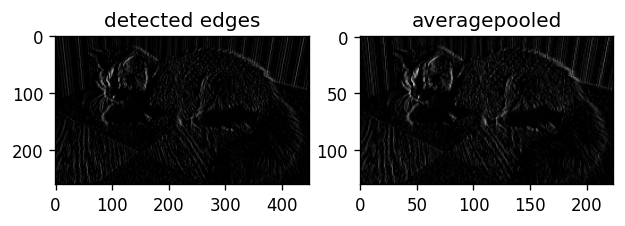

In [ ]:
temp = average_pool(edge)
plt.savefig('gdrive/My Drive/Datasets/plt_plots/avg_edges.png', dpi=1000)

100%|██████████| 131/131 [00:00<00:00, 368.86it/s]


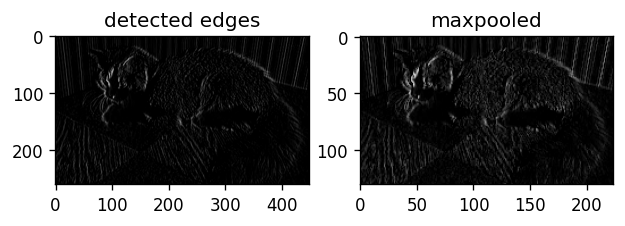

In [ ]:
temp_2 = max_pool(edge)
plt.savefig('gdrive/My Drive/Datasets/plt_plots/max_edges.png', dpi=1000)

In [ ]:
def max_pool(image, kernel_size=2, title=''):
  """This function performs convolution over an image
   with the aim of identifying edges"""
  #  creating an empty list to store convolutions
  pooled = np.zeros((image.shape[0]//2, image.shape[1]//2))
  #  instantiating counter
  k=-1
  #  maxpooling
  for i in tqdm(range(0, image.shape[0], 2)):
    k+=1
    l=-1
    if k==pooled.shape[0]:
      break
    for j in range(0, image.shape[1], 2):
      l+=1
      if l==pooled.shape[1]:
        break
      try:
        pooled[k,l] = (image[i:(i+kernel_size), j:(j+kernel_size)]).max()
      except ValueError:
        pass
  #  converting to tensor
  pooled = torch.Tensor(pooled)
  #  displaying results
  figure, axes = plt.subplots(1,2, dpi=120)
  plt.suptitle(title)
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('detected edges')
  axes[1].imshow(pooled, cmap='gray')
  axes[1].set_title('maxpooled')
  return pooled

100%|██████████| 131/131 [00:00<00:00, 1575.57it/s]


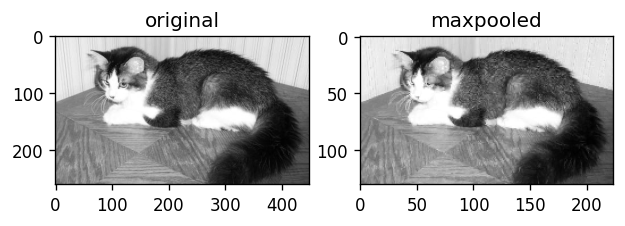

In [ ]:
sample = max_pool(cat_imgs[119])
plt.savefig('gdrive/My Drive/Datasets/plt_plots/pooled_1.png', dpi=1000)

 98%|█████████▊| 65/66 [00:00<00:00, 2307.84it/s]


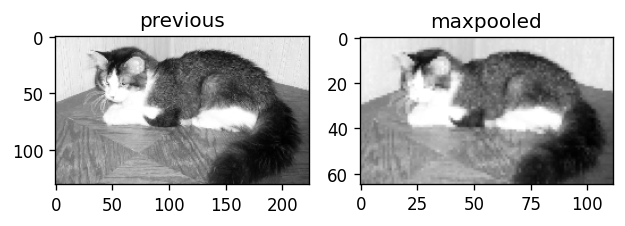

In [ ]:
sample = max_pool(np.array(sample))
plt.savefig('gdrive/My Drive/Datasets/plt_plots/pooled_2.png', dpi=1000)

 97%|█████████▋| 32/33 [00:00<00:00, 4110.05it/s]


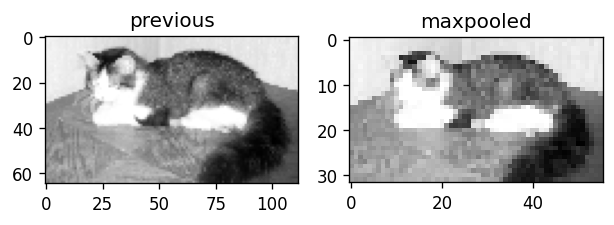

In [ ]:
sample = max_pool(np.array(sample))
plt.savefig('gdrive/My Drive/Datasets/plt_plots/pooled_3.png', dpi=1000)

100%|██████████| 16/16 [00:00<00:00, 4604.38it/s]


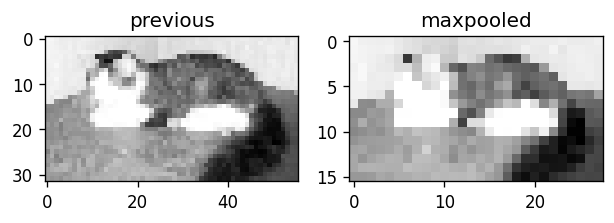

In [ ]:
sample = max_pool(np.array(sample))
plt.savefig('gdrive/My Drive/Datasets/plt_plots/pooled_4.png', dpi=1000)

In [ ]:
def average_pool(image, kernel_size=2, title=''):
  """This function performs convolution over an image
   with the aim of identifying edges"""
  #  creating an empty list to store convolutions
  pooled = np.zeros((image.shape[0]//2, image.shape[1]//2))
  #  instantiating counter
  k=-1
  #  maxpooling
  for i in tqdm(range(0, image.shape[0], 2)):
    k+=1
    l=-1
    if k==pooled.shape[0]:
      break
    for j in range(0, image.shape[1], 2):
      l+=1
      if l==pooled.shape[1]:
        break
      try:
        pooled[k,l] = (image[i:(i+kernel_size), j:(j+kernel_size)]).mean()
      except ValueError:
        pass
  #  converting to tensor
  pooled = torch.Tensor(pooled)
  #  displaying results
  figure, axes = plt.subplots(1,2, dpi=120)
  plt.suptitle(title)
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('detected edges')
  axes[1].imshow(pooled, cmap='gray')
  axes[1].set_title('averagepooled')
  return pooled

100%|██████████| 131/131 [00:00<00:00, 575.13it/s]


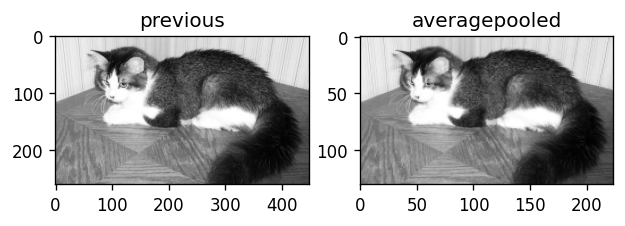

In [ ]:
sample_2 = average_pool(cat_imgs[119])

 98%|█████████▊| 65/66 [00:00<00:00, 663.88it/s]


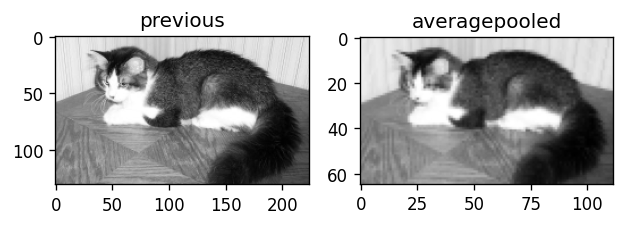

In [ ]:
sample_2 = average_pool(sample_2)

 97%|█████████▋| 32/33 [00:00<00:00, 1226.12it/s]


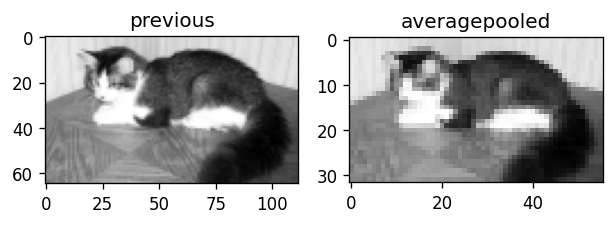

In [ ]:
sample_2 = average_pool(sample_2)

100%|██████████| 16/16 [00:00<00:00, 1696.00it/s]


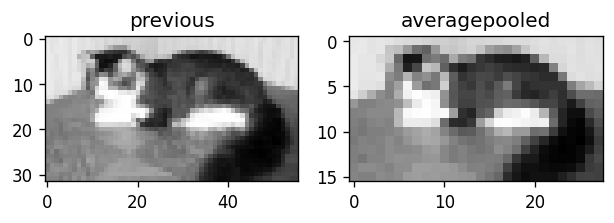

In [ ]:
sample_2 = average_pool(sample_2)

In [ ]:
def m_pool(image, kernel_size=2):
  #  creating an empty list to store convolutions
  pooled = np.zeros((image.shape[0]//2, image.shape[1]//2))
  #  instantiating counter
  k=-1
  #  maxpooling
  for i in tqdm(range(0, image.shape[0], 2)):
    k+=1
    l=-1
    if k==pooled.shape[0]:
      break
    for j in range(0, image.shape[1], 2):
      l+=1
      if l==pooled.shape[1]:
        break
      try:
        pooled[k,l] = (image[i:(i+kernel_size), j:(j+kernel_size)]).max()
      except ValueError:
        pass
  return pooled

def a_pool(image, kernel_size=2):
  #  creating an empty list to store convolutions
  pooled = np.zeros((image.shape[0]//2, image.shape[1]//2))
  #  instantiating counter
  k=-1
  #  maxpooling
  for i in tqdm(range(0, image.shape[0], 2)):
    k+=1
    l=-1
    if k==pooled.shape[0]:
      break
    for j in range(0, image.shape[1], 2):
      l+=1
      if l==pooled.shape[1]:
        break
      try:
        pooled[k,l] = (image[i:(i+kernel_size), j:(j+kernel_size)]).mean()
      except ValueError:
        pass
  return pooled

def compare_pooling(image, kernel_size=2, title=''):
  """This function performs convolution over an image
   with the aim of identifying edges"""
  #  creating lists
  max_pooled = []
  average_pooled = []
  #  average_pooling
  average_pooled.append(a_pool(image))
  #  max_pooling
  max_pooled.append(m_pool(image))

  #  instantiating counter
  i=0
  while i<3:
    average_pooled.append(a_pool(average_pooled[-1]))
    max_pooled.append(m_pool(max_pooled[-1]))
    i+=1

  #  displaying results
  figure, axes = plt.subplots(4,2, dpi=240)
  plt.suptitle(title)
  axes[0,0].imshow(max_pooled[0], cmap='gray')
  axes[0,0].set_title('maxpooled')
  axes[0,0].xaxis.set_visible(False)
  axes[0,1].imshow(average_pooled[0], cmap='gray')
  axes[0,1].set_title('averagepooled')
  axes[0,1].xaxis.set_visible(False)
  axes[1,0].imshow(max_pooled[1], cmap='gray')
  axes[1,0].xaxis.set_visible(False)
  axes[1,1].imshow(average_pooled[1], cmap='gray')
  axes[1,1].xaxis.set_visible(False)
  axes[2,0].imshow(max_pooled[2], cmap='gray')
  axes[2,0].xaxis.set_visible(False)
  axes[2,1].imshow(average_pooled[2], cmap='gray')
  axes[2,1].xaxis.set_visible(False)
  axes[3,0].imshow(max_pooled[3], cmap='gray')
  axes[3,0].xaxis.set_visible(False)
  axes[3,1].imshow(average_pooled[3], cmap='gray')
  axes[3,1].xaxis.set_visible(False)
  pass

100%|██████████| 16/16 [00:00<00:00, 5511.57it/s]


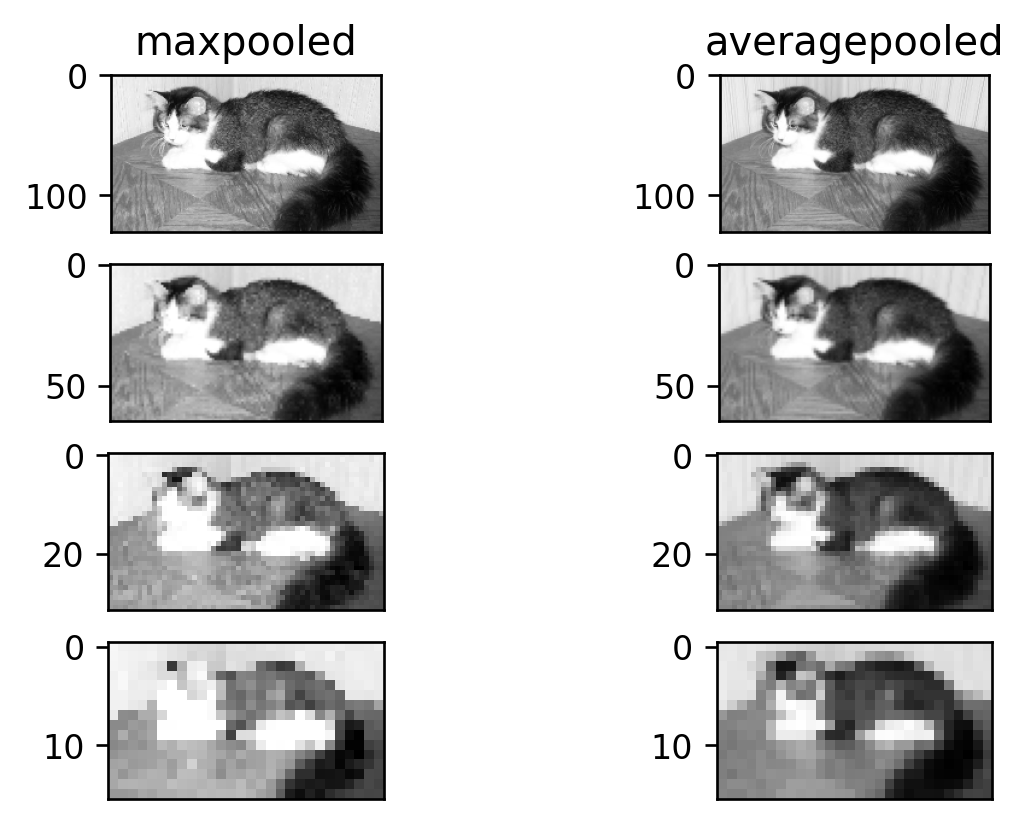

In [ ]:
compare_pooling(cat_imgs[119])
plt.savefig('gdrive/My Drive/Datasets/plt_plots/pooling_compared.png', dpi=1000)

100%|██████████| 196/196 [00:00<00:00, 747.33it/s]


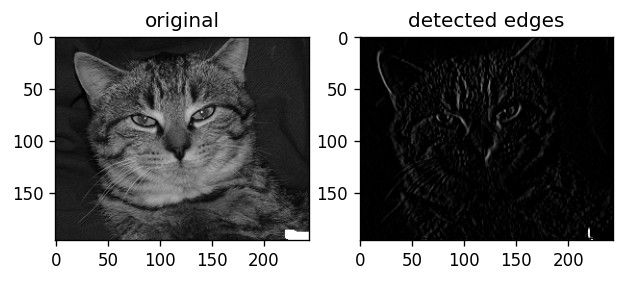

In [ ]:
detect_edges(cat_imgs[39])
plt.savefig('gdrive/My Drive/Datasets/plt_plots/sample_2.png', dpi=1000)

100%|██████████| 400/400 [00:00<00:00, 516.88it/s]


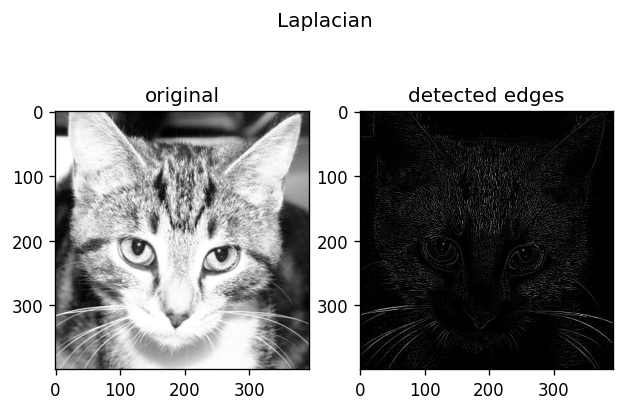

In [ ]:
filter = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

detect_edges(cat_imgs[119], filter=filter, title='Laplacian')
plt.savefig('gdrive/My Drive/Datasets/plt_plots/laplacian_2.png', dpi=1000)

Prewitt y:
$$\begin{bmatrix} 1 & 1 & 1 \\ 0 & 0 & 0 \\ -1 & -1 & -1 \end{bmatrix}$$

Prewitt x:
$$\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$$

Sobel y:
$$\begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & 2 & -1 \end{bmatrix}$$

Sobel x:
$$\begin{bmatrix} 1 & 0 & -1 \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{bmatrix}$$

Laplacian:
$$\begin{bmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & -1 \end{bmatrix}$$

In [ ]:
def blur_image(image, intensity=10):
  """This function performs convolution over an image
   with the aim of identifying edges"""
  filter = 0.1*(np.ones((intensity,intensity)))
  #  creating an empty list to store convolutions
  edges = np.zeros(image.shape)
  #  performing convolution
  for i in tqdm(range(image.shape[0])):
    for j in range(image.shape[1]):
      try:
        edges[i,j] = ((image[i:(i+intensity), j:(j+intensity)] * filter).sum())
      except ValueError:
        pass
  edges = torch.Tensor(edges)
  #  saving to memory
  np.save('conv_pixels.npy', edges)
  return edges

100%|██████████| 400/400 [00:00<00:00, 474.46it/s]


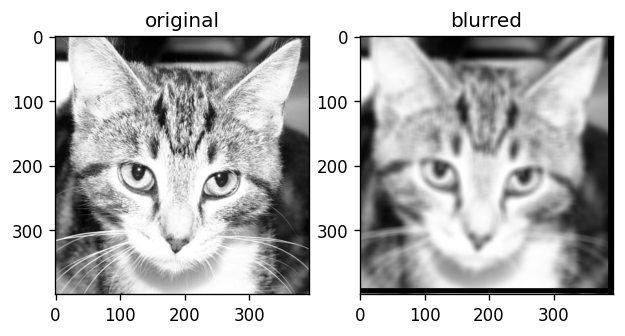

In [ ]:
blur_image(cat_imgs[119])

100%|██████████| 369/369 [00:00<00:00, 377.98it/s]


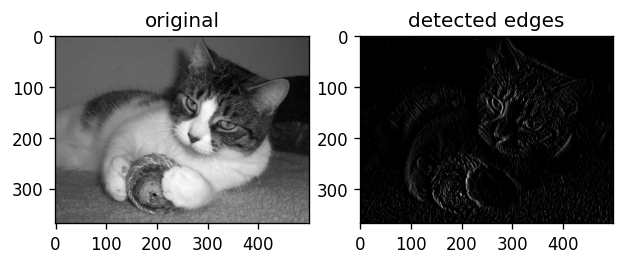

In [ ]:
detect_edges(sample)

100%|██████████| 375/375 [00:00<00:00, 381.31it/s]


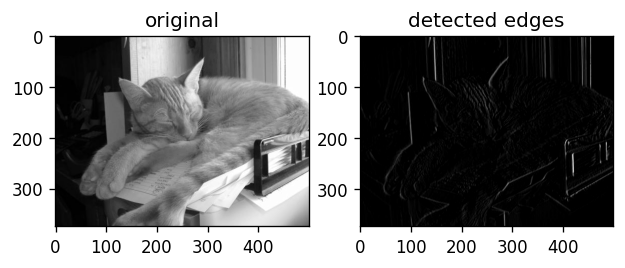

In [ ]:
detect_edges(cat_imgs[7561])

100%|██████████| 278/278 [00:00<00:00, 413.87it/s]


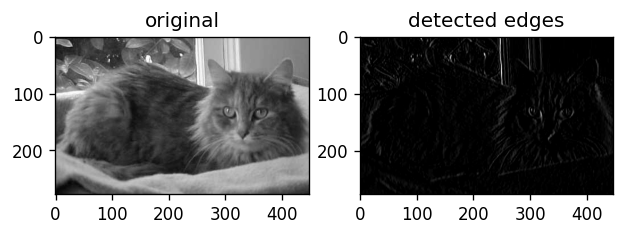

In [ ]:
detect_edges(cat_imgs[1047])

In [ ]:
#  creating an arbitrary tensor
values = torch.arange(-10, 11)

In [ ]:
values

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9,  10])

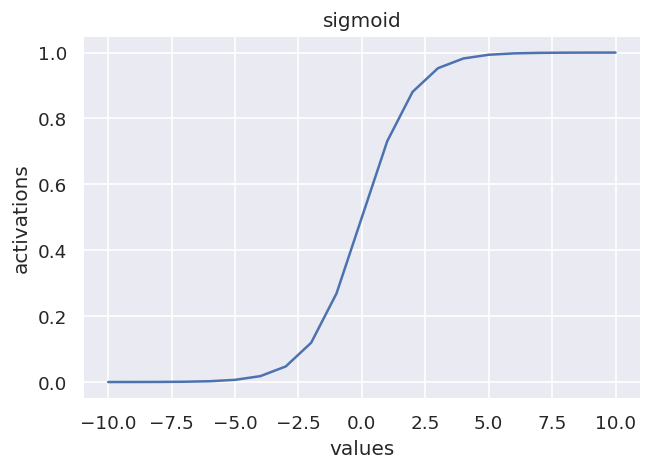

In [ ]:
plt.figure(dpi=120)
sns.lineplot(x=values, y=torch.sigmoid(values))
plt.ylabel('activations')
plt.xlabel('values')
plt.title('sigmoid')

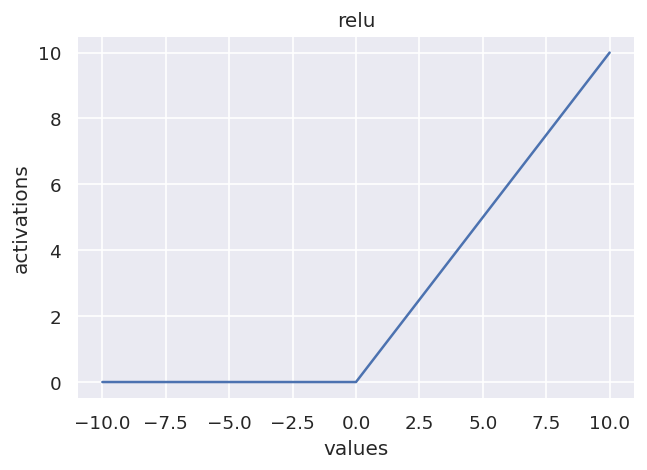

In [ ]:
plt.figure(dpi=120)
sns.lineplot(x=values, y=F.relu(values))
plt.ylabel('activations')
plt.xlabel('values')
plt.title('relu')
plt.savefig('gdrive/My Drive/Datasets/plt_plots/relu.png', dpi=1000)

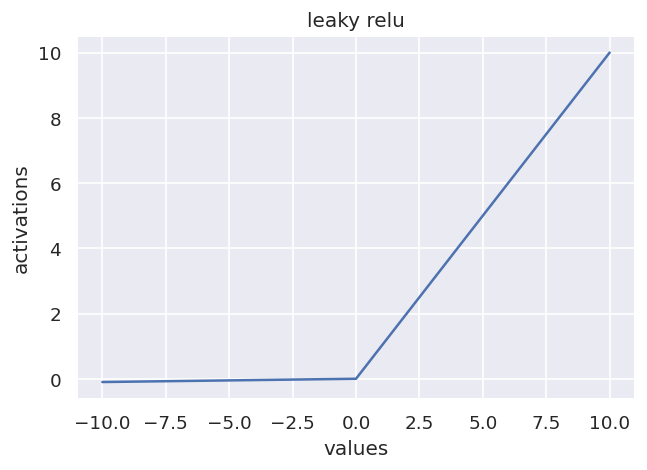

In [ ]:
plt.figure(dpi=120)
sns.lineplot(x=values, y=F.leaky_relu(values.type(torch.float32)))
plt.ylabel('activations')
plt.xlabel('values')
plt.title('leaky relu')
plt.savefig('gdrive/My Drive/Datasets/plt_plots/leaky_relu.png', dpi=1000)

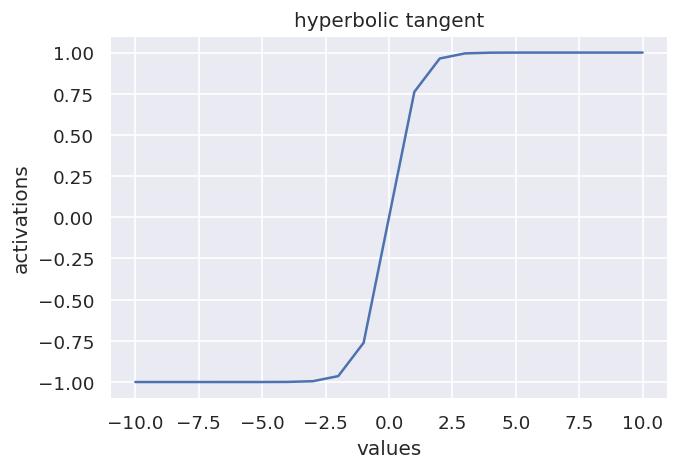

In [ ]:
plt.figure(dpi=120)
sns.lineplot(x=values, y=torch.tanh(values))
plt.ylabel('activations')
plt.xlabel('values')
plt.title('hyperbolic tangent')
plt.savefig('gdrive/My Drive/Datasets/plt_plots/tanh.png', dpi=1000)